<h1>Mallit: Betonin lujuuteen vaikuttavia tekijöitä (useamman selittäjän lineaarinen regressio)</h1>

In [1]:
# Tuon kirjastot:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Avaan datan:
df = pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
# Lyhennetään sarakkeiden nimiä:
df.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water',
                  'Superplasticizer','Coarse Aggregate','Fine Aggregate',
                  'Age','Strenght']

# Selityskerroin kasvaa, kun käytetään iän logaritmia:
df['Age2'] = np.log(df['Age'])

df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strenght,Age2
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,3.332205
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,3.332205
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,5.598422
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,5.899897
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,5.886104
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,3.332205
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,3.332205
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,3.332205
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,3.332205


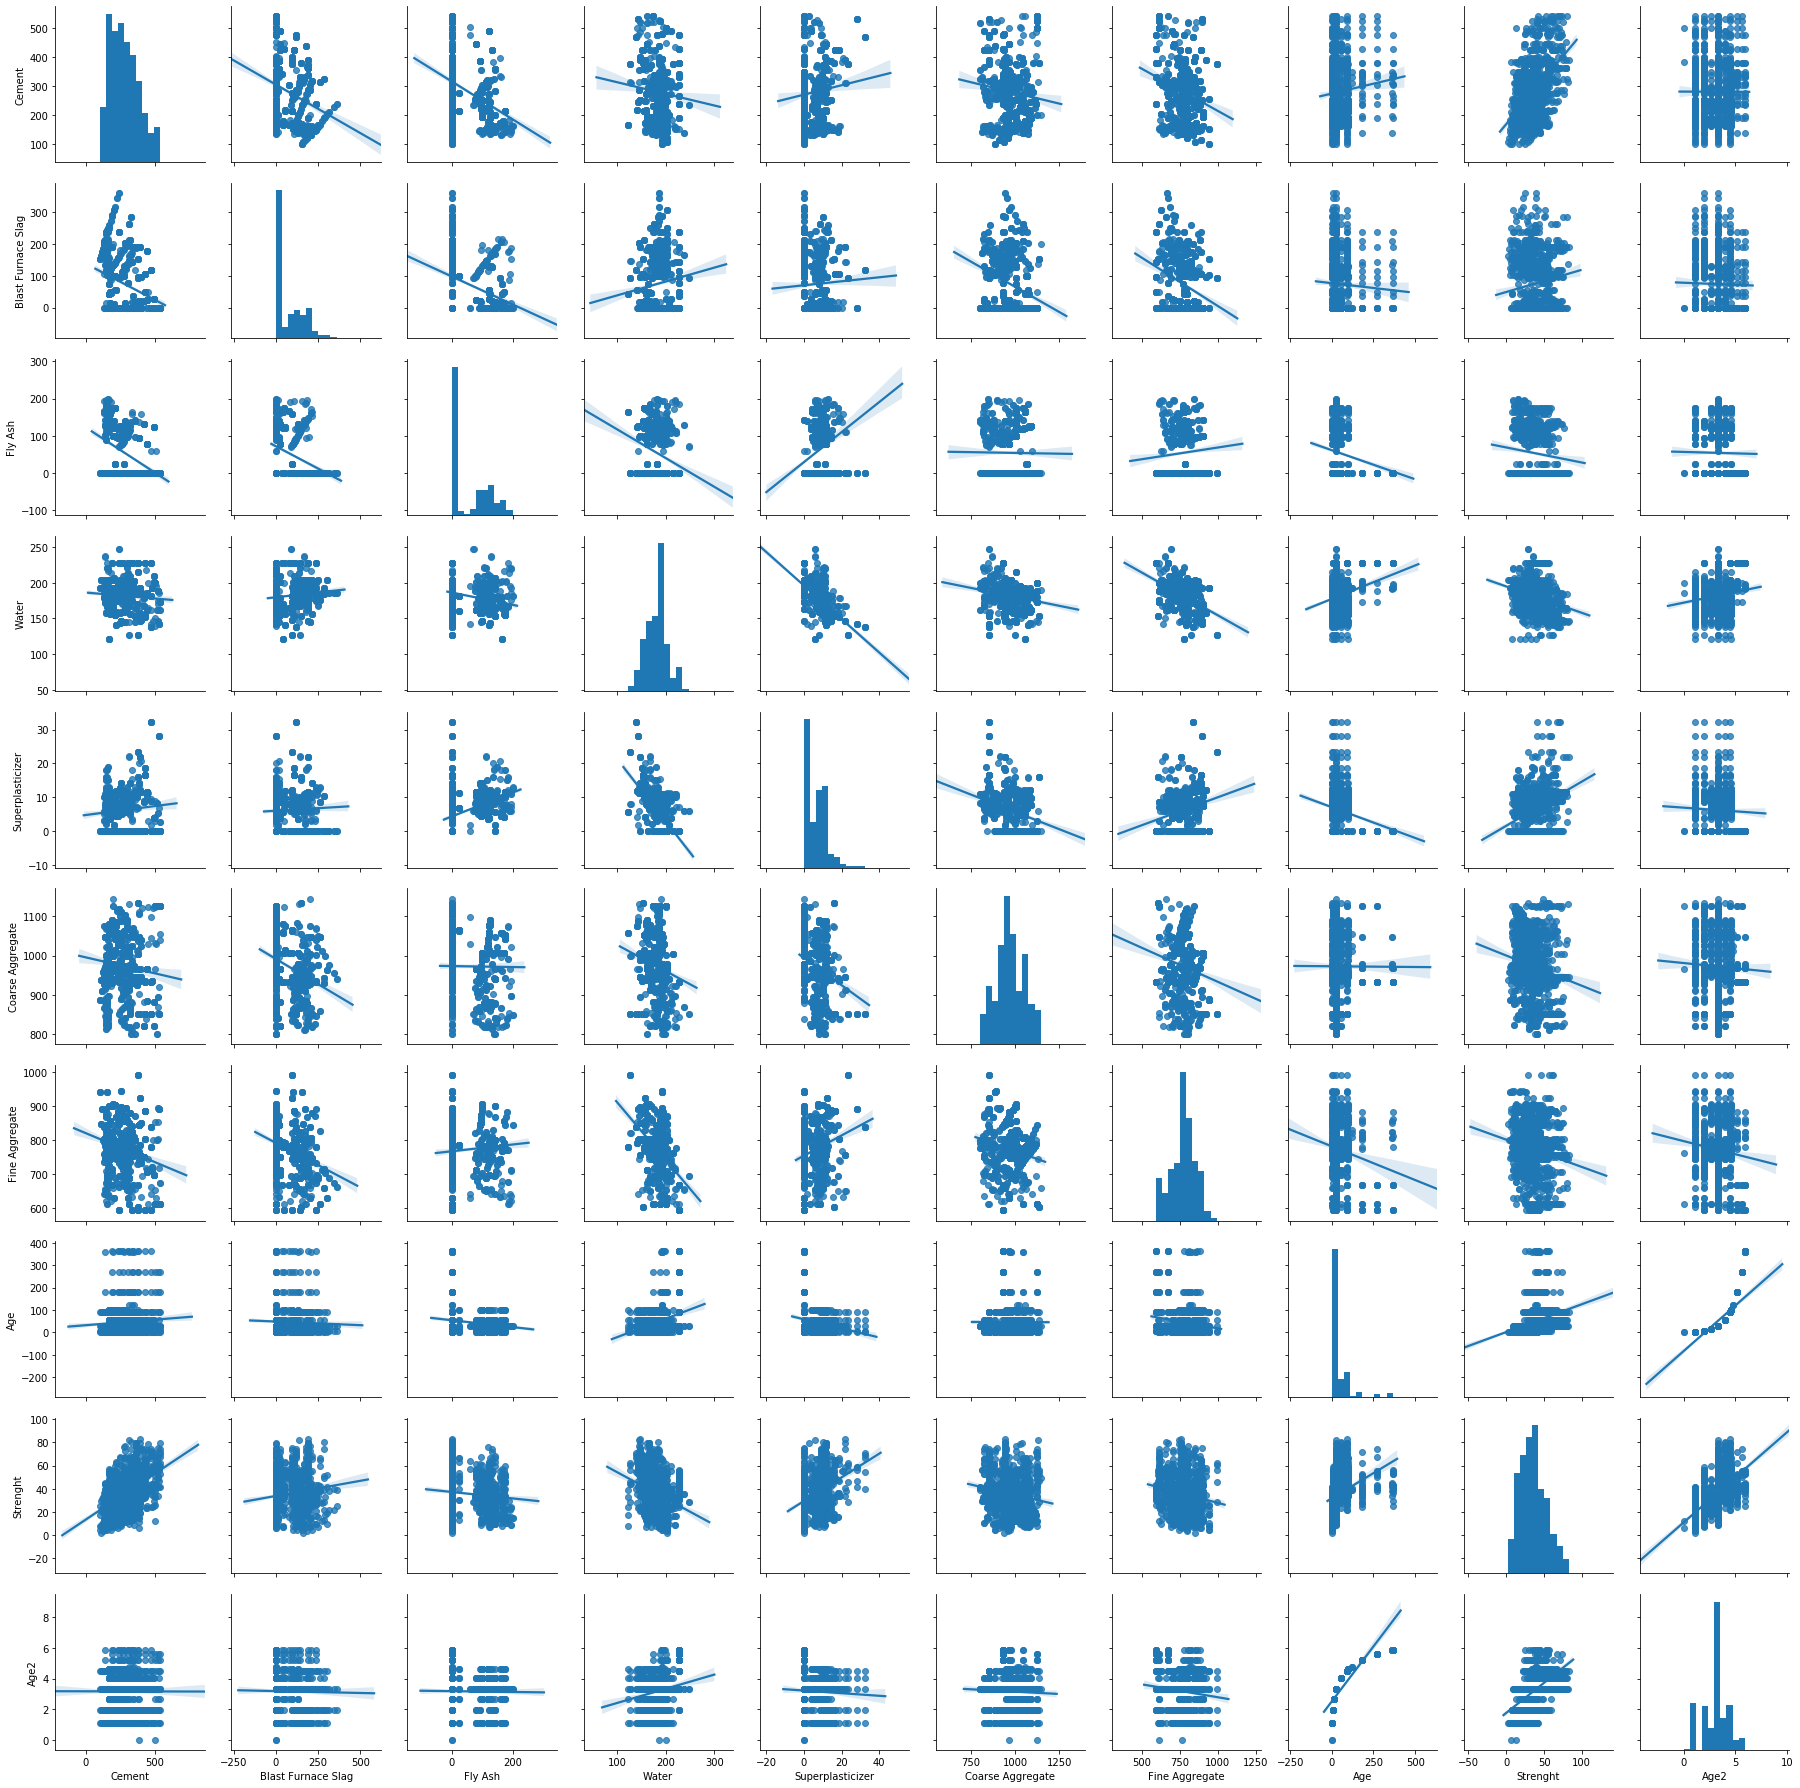

In [5]:
# Riippuvuuksien tarkastelua seaborn-kirjaston hajontakuvioina
sns.pairplot(df, kind='reg')

(10.0, 0.0)

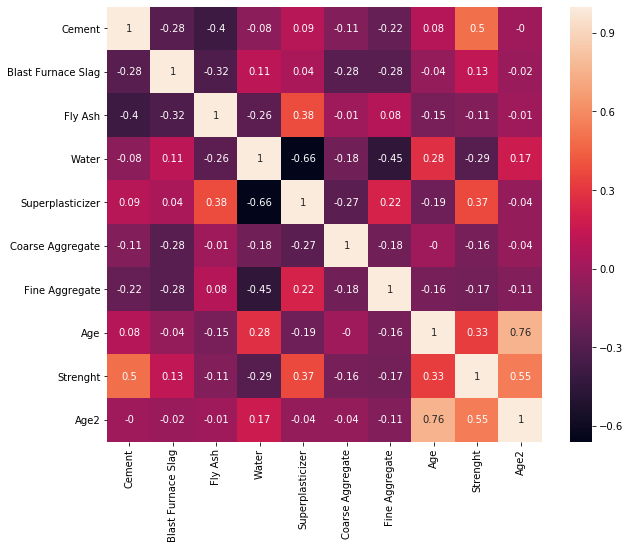

In [6]:
# Riippuvuuksien tarkastelua korrelaatiokertoimien avulla
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(10,8))
sns.heatmap(data=correlation_matrix, annot=True, square=True) # Korrelaatioiden taustaväri seaborn-kirjaston heatmap-funktiolla

# Korjataan bugi matplotlib'n versiossa 3.1.1
# https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [7]:
# Datan valmistelu
# feature-matriisi X
X = df[['Cement','Blast Furnace Slag','Fly Ash','Water',
                  'Superplasticizer','Coarse Aggregate','Fine Aggregate',
                  'Age','Age2']]
# target eli selitettävä/ennustettava muuttuja
y = df['Strenght']

In [8]:
# Tuon lineaarisen regressiomallin
from sklearn.linear_model import LinearRegression

# Sovitan mallin dataan
malli = LinearRegression().fit(X,y)

In [9]:
malli.coef_ # regressiosuoran kulmakerroin

array([ 0.13562117,  0.11414499,  0.09047574, -0.11778163,  0.09880457,
        0.030073  ,  0.03551794, -0.03756989, 10.22255409])

In [10]:
malli.intercept_ # regressiosuoran vakiotermi

-82.2560193166398

In [11]:
malli.score(X,y) # selityskerroin

0.8260046216647294

Text(0, 0.5, 'Poikkeama todellisesta')

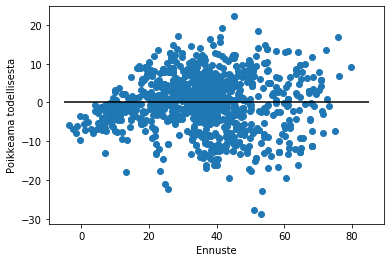

In [12]:
# Mallin virhetermit pistekuviona
plt.scatter(malli.predict(X), malli.predict(X)-y)

# Vaakaviiva nollapoikkeaman kohdalle
plt.hlines(y=0,xmin=-5,xmax=85)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

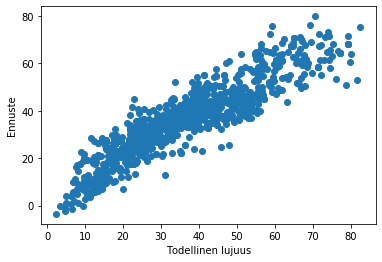

In [13]:
# Todellisen lujuuden ja mallin antamien ennusteiden vastaavuus pistekuviona
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen lujuus')
plt.ylabel('Ennuste')